In [127]:
### data loading and housing prediction problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import os
path = "/Users/ajaykumar/Desktop/personal/ML/git_project/deploy_machine_learning/MLPipeline-Notebooks/walmart-recruiting-store-sales-forecasting"
os.chdir(path)
## to display all columns of dataframe
pd.pandas.set_option("display.max_columns",None)

In [128]:
dataset = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

In [129]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [130]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [131]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [132]:
print(dataset.shape, features.shape, stores.shape)

(421570, 5) (8190, 12) (45, 3)


In [133]:
dataset = dataset.merge(features,how='left').merge(stores,how='left')

In [134]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [135]:
dataset.shape

(421570, 16)

In [136]:
dataset.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [138]:
data=dataset

We will analyse the data:
1. missing value
2. numerical parameters
3. distribution numerical parameters and outliers
4. categorical parameters
5. cardinality of the categorical variables
6. potential relationship between parameters and target

# Missing value Analysis functions

In [139]:
x = num_var(data)
[col for col in data.columns if len(data[col].unique()) < 20 and col in x]

[]

In [140]:
print("rows", data.shape[0])
print("columns", data.shape[1])
print("features:  \n", data.columns.tolist())
print("missing_values\n ", data.isnull().sum())
print("\n unique label\n", data.nunique())

rows 421570
columns 16
features:  
 ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']
missing_values
  Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

 unique label
 Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
Type                 3
Size             

In [141]:
### numerical and categorical parameters missing value detail analysis

# list of  numerical columns 
def num_var(df):
    lst_num = [col for col in df.columns if df[col].dtype in ['int','float','int64','float64']]
    return lst_num

# list of categorical columns
def cat_var(df):
    lst_cat = [col for col in df.columns if df[col].dtype in ['bool','O']]
    return lst_cat

# discrete numerical columns
def discrete_var(df):
    num_col = num_var(df)
    lst_disc = [col for col in df.columns if len(df[col].unique()) < 20 and col in num_col]
    return lst_disc

# list of parameters having missing value greater than 10%
def missing_val_grt_ten_pert(df):
    lst_var = [col for col in df.columns if (df[col].isnull().sum()/df.shape[0])*100 > 10 ]
    for c in lst_var:
        print("{:25} {:.2f}".format(c,(df[c].isnull().sum()/df.shape[0])*100))
    return lst_val

def missing_val_details(df):
    lst_cat = cat_var(df)
    lst_num = num_var(df)
    print("######################### Categorical columns missing details ############################## \n")
    for c in lst_cat:
        print('{:40} Total count:{:8}    Missing Count:{:10}   per: {:5}'.format(c,df[c].shape[0],\
                                df[c].isnull().sum(),(df[c].isnull().sum()/df[c].shape[0])*100))
    print("\n\n######################### Numerical columns missing details ############################## \n")
    for c in lst_num:
        print('{:40} Total count:{:8}    Missing Count:{:10}   per: {:5}'.format(c,df[c].shape[0],\
                                df[c].isnull().sum(),(df[c].isnull().sum()/df[c].shape[0])*100))
        
def missing_na_plot(df):
    plt.figure(figsize=(10,10))
    sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis', cbar=False)
    
def corr_plot(df):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.corr(),cbar='coolwarm',cmap='viridis', annot=True)
        
def scale_max_min(data):
    return (data - data.min())/(data.max()-data.min())
    
    
    

In [142]:
num_var(data)

['Store',
 'Dept',
 'Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size']

In [143]:
cat_var(data)

['Date', 'IsHoliday', 'Type']

In [144]:
data['IsHoliday'].dtype

dtype('bool')

In [145]:
data.loc[data['IsHoliday']==True,'IsHoliday']='yes'

In [146]:
data.loc[data['IsHoliday']==False,'IsHoliday']='no'

In [147]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,no,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,yes,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,no,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,no,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,no,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [148]:
data['Date'] = pd.to_datetime(data['Date'])

In [149]:
data['Month'] = data.Date.dt.month
data['Weekly'] = data.Date.dt.week
data['Day'] = data.Date.dt.weekday

In [150]:
missing_val_details(data)

######################### Categorical columns missing details ############################## 

IsHoliday                                Total count:  421570    Missing Count:         0   per:   0.0
Type                                     Total count:  421570    Missing Count:         0   per:   0.0


######################### Numerical columns missing details ############################## 

Store                                    Total count:  421570    Missing Count:         0   per:   0.0
Dept                                     Total count:  421570    Missing Count:         0   per:   0.0
Weekly_Sales                             Total count:  421570    Missing Count:         0   per:   0.0
Temperature                              Total count:  421570    Missing Count:         0   per:   0.0
Fuel_Price                               Total count:  421570    Missing Count:         0   per:   0.0
MarkDown1                                Total count:  421570    Missing Count:    270889

In [151]:
lst = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
data[lst] = data[lst].fillna(0)

In [152]:
missing_val_details(data)

######################### Categorical columns missing details ############################## 

IsHoliday                                Total count:  421570    Missing Count:         0   per:   0.0
Type                                     Total count:  421570    Missing Count:         0   per:   0.0


######################### Numerical columns missing details ############################## 

Store                                    Total count:  421570    Missing Count:         0   per:   0.0
Dept                                     Total count:  421570    Missing Count:         0   per:   0.0
Weekly_Sales                             Total count:  421570    Missing Count:         0   per:   0.0
Temperature                              Total count:  421570    Missing Count:         0   per:   0.0
Fuel_Price                               Total count:  421570    Missing Count:         0   per:   0.0
MarkDown1                                Total count:  421570    Missing Count:         0

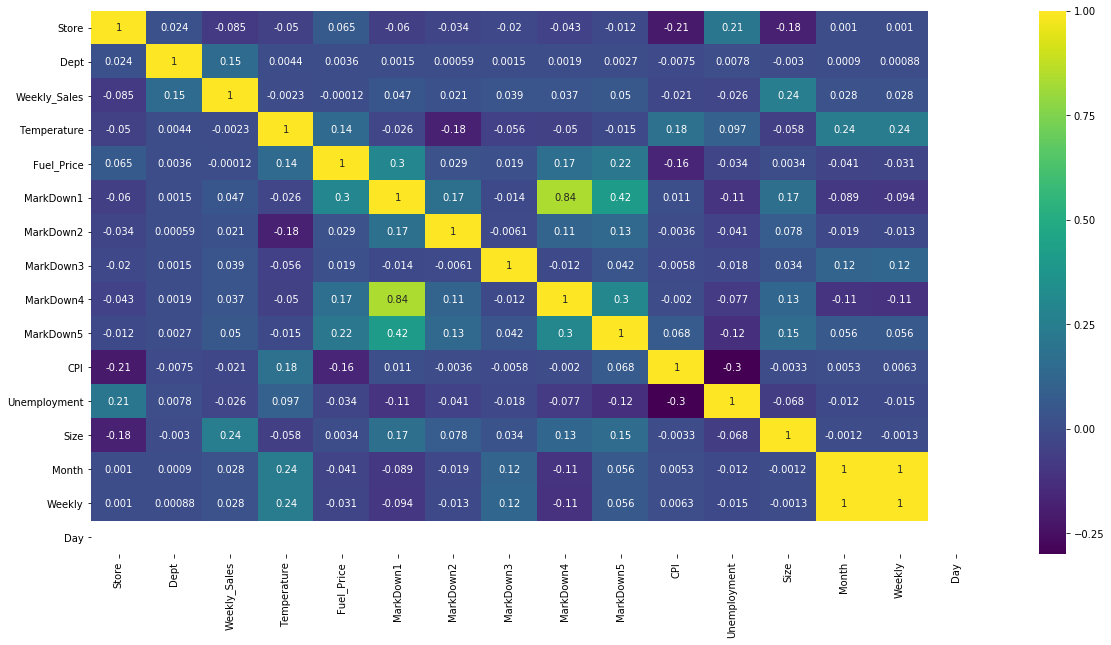

In [153]:
corr_plot(data)

# Analysis of numerical value and outliers
    
    

In [154]:
## defining functions for plotting numerical value and it distribution

def distribution_plot(df, var,target):
    plt.figure(figsize=(10,3))
    ax = plt.subplot(1,2,1)
    sns.distplot(df[var].dropna(), fit=stats.norm)
    plt.xlabel(var)
    ax = plt.subplot(1,2,2)
    sns.regplot(var,target, data=df,scatter_kws= {'marker' : '.', 's' : 3, 'alpha' : .3},
                   line_kws = {'color' : 'k'})
    plt.xlabel(var)
    plt.ylabel(target)
    
def dist_plot(df,var,target):
    plt.figure(figsize=(5,5))
    sns.distplot(df[var].dropna())
    plt.xlabel(var)


#target = 'SalePrice'
# for var in num_val(data):
#     distribution_plot(data,var,target)

## analysis of discrete numerical parameters

def analyse_discrete(df,var,target):
    df.groupby(var)[target].median().plot.bar()
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()
    
# plot for detecting outliers through boxplot

def analyse_boxplot(df,var):
    plt.figure(figsize=(5,5))
    sns.boxplot(y=df[var])
    plt.title(var)
    

In [155]:
print(data.columns)
print(num_var(data))

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Weekly',
       'Day'],
      dtype='object')
['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Month', 'Weekly', 'Day']


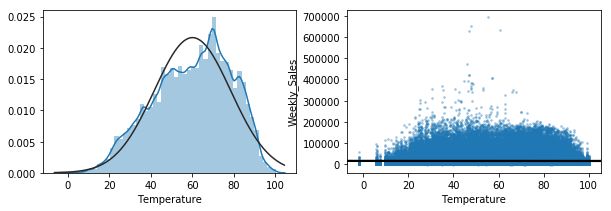

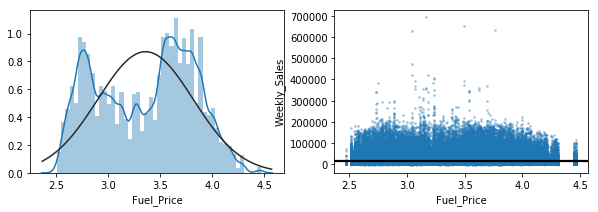

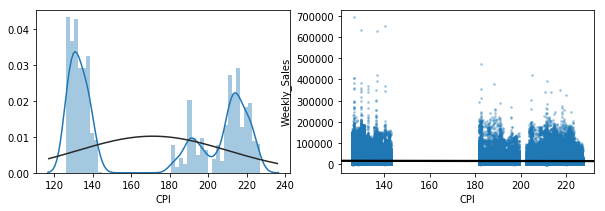

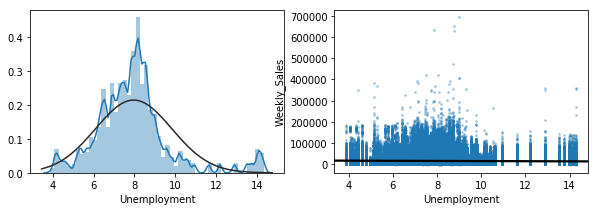

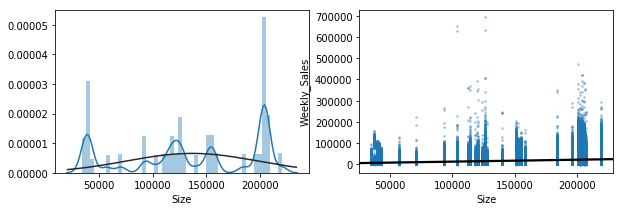

In [156]:
for col in num_var(data):
    if col in ['Temperature', 'Fuel_Price','CPI', 'Unemployment', 'Size']:
        distribution_plot(data,col,'Weekly_Sales')
        

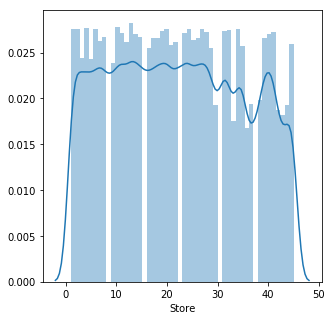

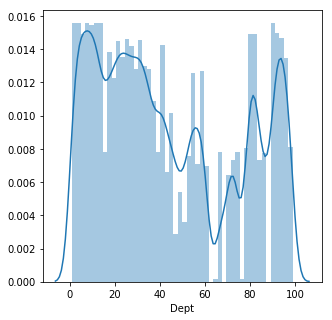

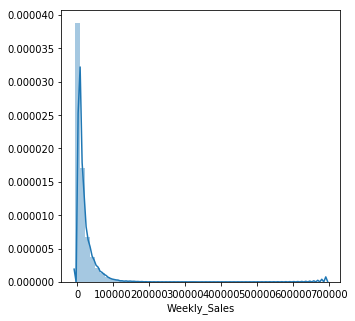

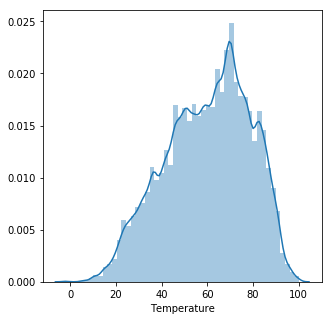

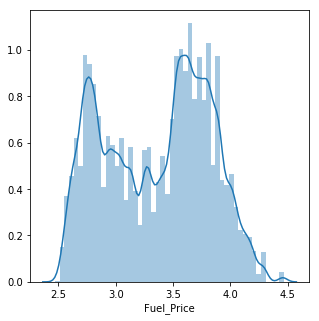

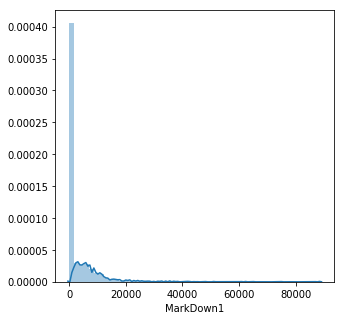

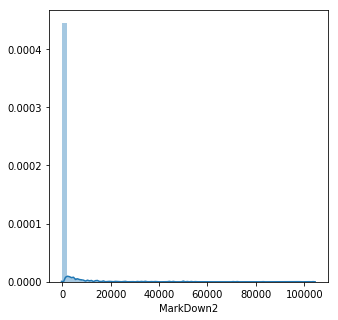

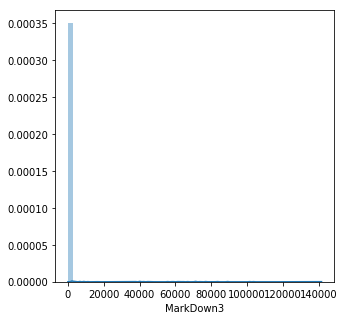

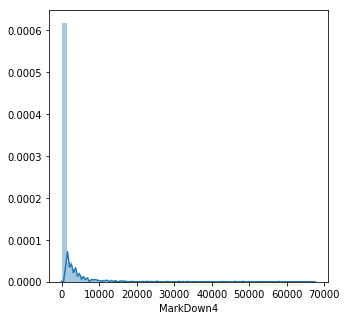

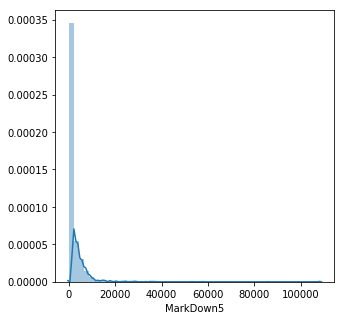

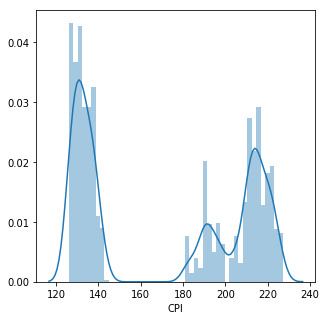

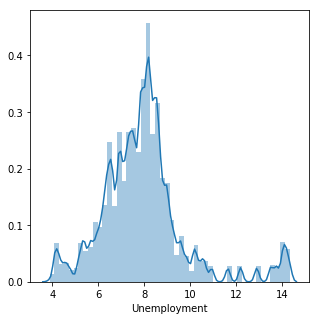

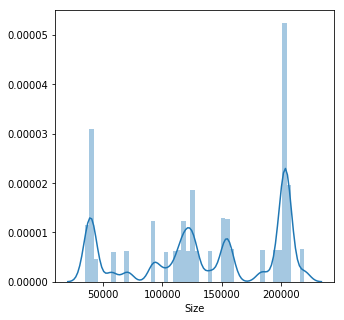

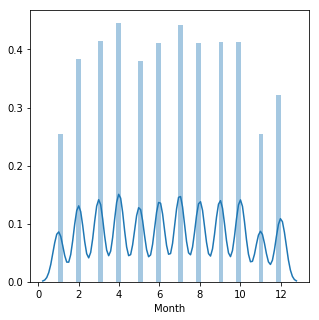

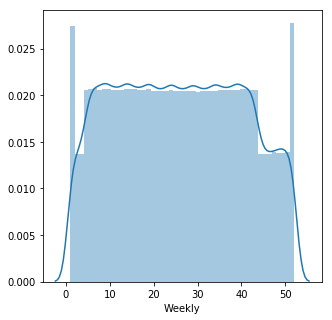

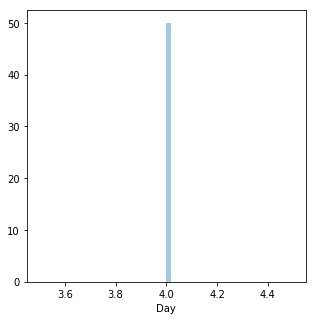

In [157]:
for col in num_var(data):
    dist_plot(data,col,'Weekly_Sales')

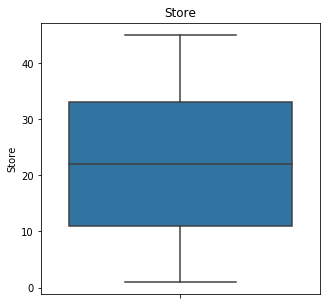

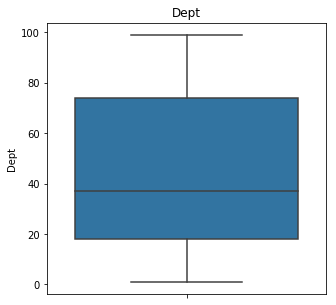

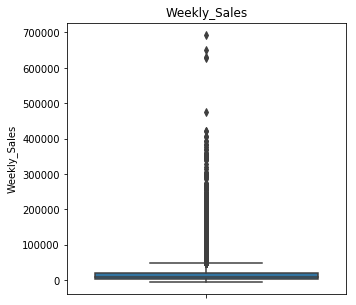

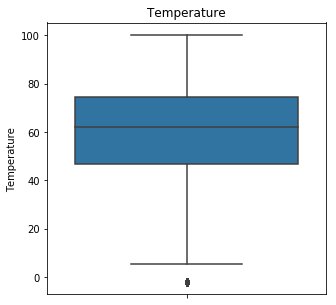

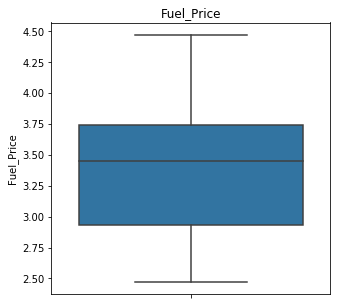

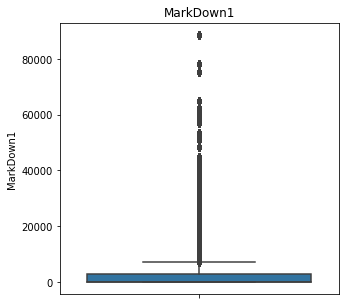

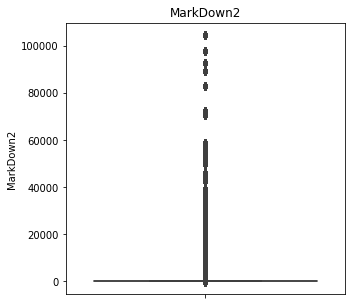

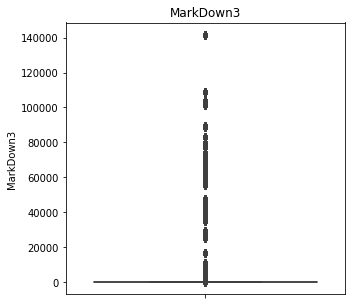

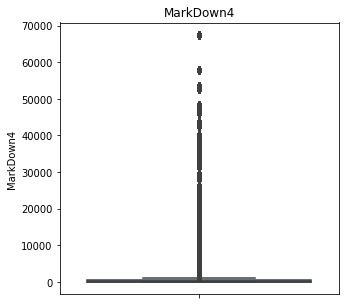

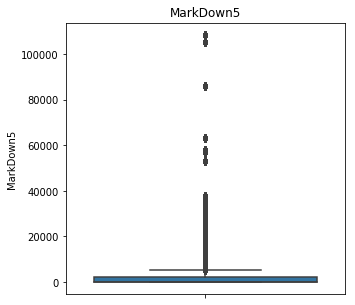

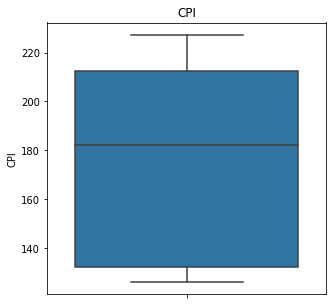

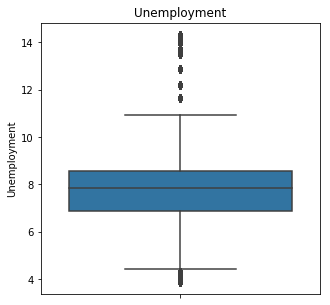

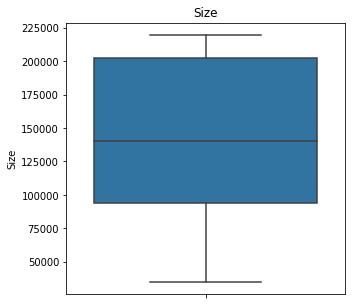

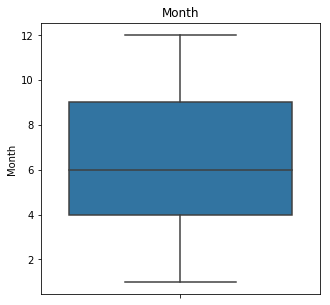

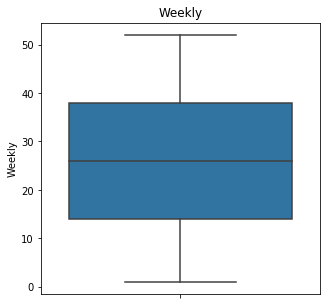

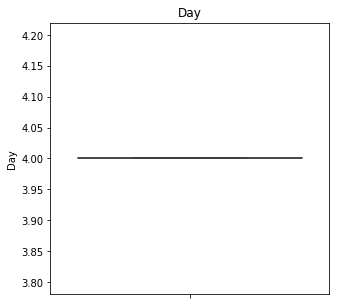

In [158]:
for col in num_var(data):
    analyse_boxplot(data,col)

# Categorical Variable analysis

In [159]:

## analysis of rare labels present in each categorical variables        
def analysis_rare_labels(df,var,target,rare_perc):
    tmp = df.groupby(var)[target].count()/df.shape[0]
    return tmp[tmp < rare_perc]

# countplot of each lable in categorical variable
def countplot_categorical(df,var,target):
    plt.figure(figsize=(8,4))
    sns.countplot(df[var])
    
# analysis of categorical variable on target variable
def analyse_categorical(df, var, target):
    plt.figure(figsize=(8,4))
    sns.violinplot(x=df[var], y=df[target])
    
# for var in cat_var(data):
#     print(analysis_rare_labels(data,var,target,.01))
#     print()

# for var in cat_var(data):
#     analyse_categorical(data,var,target)

In [160]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Weekly',
       'Day'],
      dtype='object')

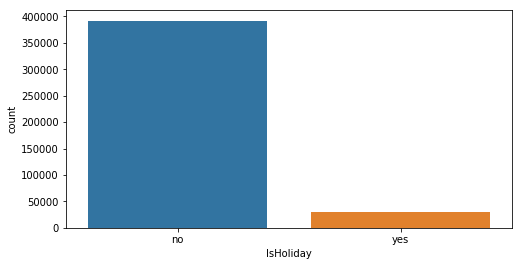

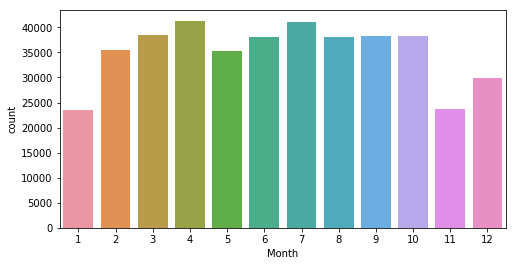

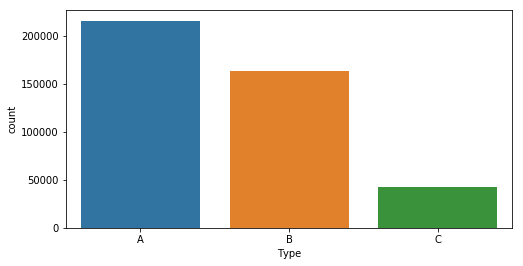

In [161]:
for col in ['IsHoliday','Month','Type']:
    countplot_categorical(data,col,'Weekly_Sales')

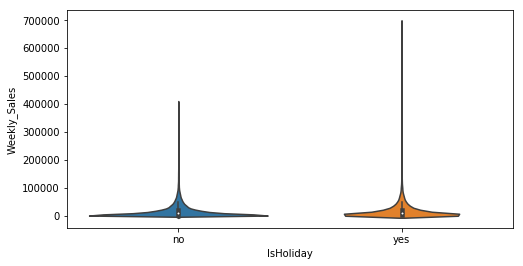

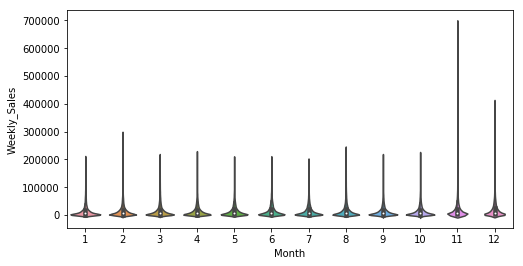

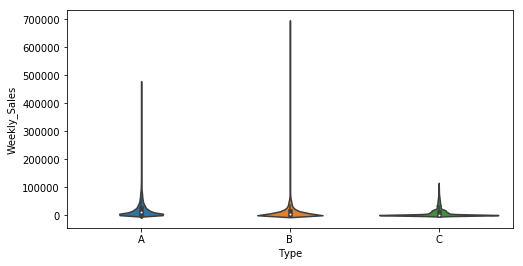

In [162]:
for col in ['IsHoliday','Month','Type']:
    analyse_categorical(data,col,'Weekly_Sales')

# Missing value and outlier treatment

In [163]:
## replacing missing with mode
def fill_categorical_na(df):
    lst_cat = cat_var(df)
    for var in lst_cat:
        df[var] = df[var].fillna(df[var].value_counts().index[0])
    return df
## replacing missing with median
def fill_numerical_na(df):
    lst_num = num_var(df)
    return df[lst_num].fillna(df[lst_num].median())

## outlier handling with interquantile range
def outlier_handling_quantile(df,lst):
    lst_num = lst
    for var in lst_num:
        firstquartile = df[var].quantile(0.25)
        thirdquartile = df[var].quantile(0.75)
        iqr_range = thirdquartile - firstquartile
        lbound = firstquartile - 1.5*iqr_range
        ubound = thirdquartile - 1.5*iqr_range
        df = df.loc[(df[var]>lbound) & (df[var]<ubound),:]
    return df

## capping for outlier treament
def outlier_handling_capping(df, lst):
    lst_num = lst
    for var in lst_num:
        perc = df[var].describe(percentiles=[0.01,0.50,0.99])
        df[var] = df[var].apply(lambda x : np.where( perc["99%"] > x and x > perc['1%'], x,
                                                    (np.where(x > perc['99%'],perc['99%'],perc['1%'] ))))
    return df    

    

# Categorical Rare label handling and missing label

In [164]:
def find_frequent_labels(df,var,target,rare_perc):
    tmp = df.groupby(var)[target].count()/df.shape[0]
    return tmp[tmp>rare_perc].index
    
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    df[var_list] = df[var_list].fillna('Missing')
    return df
## creating new label rare for less frequent labels
# for var in cat_var(data):
#     freq_ls = find_frequent_labels(data,var,target,0.01)
#     data[var] = np.where(data[var].isin(freq_ls),data[var],'Rare')

# Label encoding and ordinal label

In [165]:
# converting categorical into numerical value
def dummies_conversion(df):
    return pd.get_dummies(df)


# Training , feature selection and model building

In [166]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_predict, cross_val_score,train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer,r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler


In [167]:
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

In [168]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Weekly,Day
0,1,1,2010-02-05,24924.50,no,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,5,4
1,1,1,2010-02-12,46039.49,yes,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2,6,4
2,1,1,2010-02-19,41595.55,no,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2,7,4
3,1,1,2010-02-26,19403.54,no,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2,8,4
4,1,1,2010-03-05,21827.90,no,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,3,9,4


In [169]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Weekly',
       'Day'],
      dtype='object')

In [170]:
data.drop(['Date'], axis=1, inplace=True)

In [171]:
target = 'Weekly_Sales'

In [172]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(target,axis=1),data[target],
                                                    test_size=0.2, random_state=42)

In [173]:
X_train = dummies_conversion(X_train)
X_test = dummies_conversion(X_test)

In [175]:
print(X_train.shape,X_test.shape)

(337256, 20) (84314, 20)


In [176]:
X_test = X_test.reindex(columns=X_train.columns)

In [177]:
### Random forest for modelling

model_rf = RandomForestRegressor(n_estimators=200,max_depth=6, n_jobs=-1)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_train)

print( "R-score : " , r2_score(y_train,pred_rf))
print("Rmse :" , rmse(y_train, pred_rf))

R-score :  0.7211239597072692
Rmse : 11976.965650185157


In [178]:
print("Test R-score :" , r2_score(y_test,model_rf.predict(X_test)))
print("Rmse :", rmse(y_test,model_rf.predict(X_test)))

Test R-score : 0.7144127385018472
Rmse : 12203.502481119205


In [181]:
Feature_imp = pd.Series(model_rf.feature_importances_,index=X_train.columns)
# plt.figure(figsize=(8,20))
# #Feature_imp.sort_values().plot.barh()
# plt.title('Features imp')
Feature_imp


Store            1.326171e-02
Dept             7.641850e-01
Temperature      5.996231e-05
Fuel_Price       2.020604e-05
MarkDown1        4.561068e-08
MarkDown2        0.000000e+00
MarkDown3        2.754228e-03
MarkDown4        2.423512e-09
MarkDown5        3.412647e-05
CPI              3.015974e-03
Unemployment     1.069451e-04
Size             1.915322e-01
Month            0.000000e+00
Weekly           1.213587e-02
Day              0.000000e+00
IsHoliday_no     0.000000e+00
IsHoliday_yes    0.000000e+00
Type_A           1.892953e-04
Type_B           1.270417e-02
Type_C           2.359773e-07
dtype: float64

In [ ]:
### Linear model 

model_rd = Ridge()
model_rd.fit(X_train,y_train)
pred_rd = model_rf.predict(X_train)

print( "R-score : " , r2_score(y_train,pred_rf))
print("Rmse :" , rmse(y_train, pred_rf))